In [1]:
from qiskit.providers.fake_provider import FakeGuadalupe

from aais.ibm import get_mach
from simuq.solver import generate_as
from systems.qaoa import qs
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub="ibm-q-ornl", group="ornl", project="phy147")
# backend=FakeGuadalupe()
backend=provider.get_backend("ibmq_guadalupe")
mach=get_mach(backend)

In [2]:
assembly=generate_as(qs, mach, 1)
with open("qaoa.as","w+") as f:
    f.write(str(assembly[1])+"\n")
    for item in assembly[2]:
        f.write(str(item)+"\n")
    for item in assembly[3]:
        f.write(str(item)+"\n")

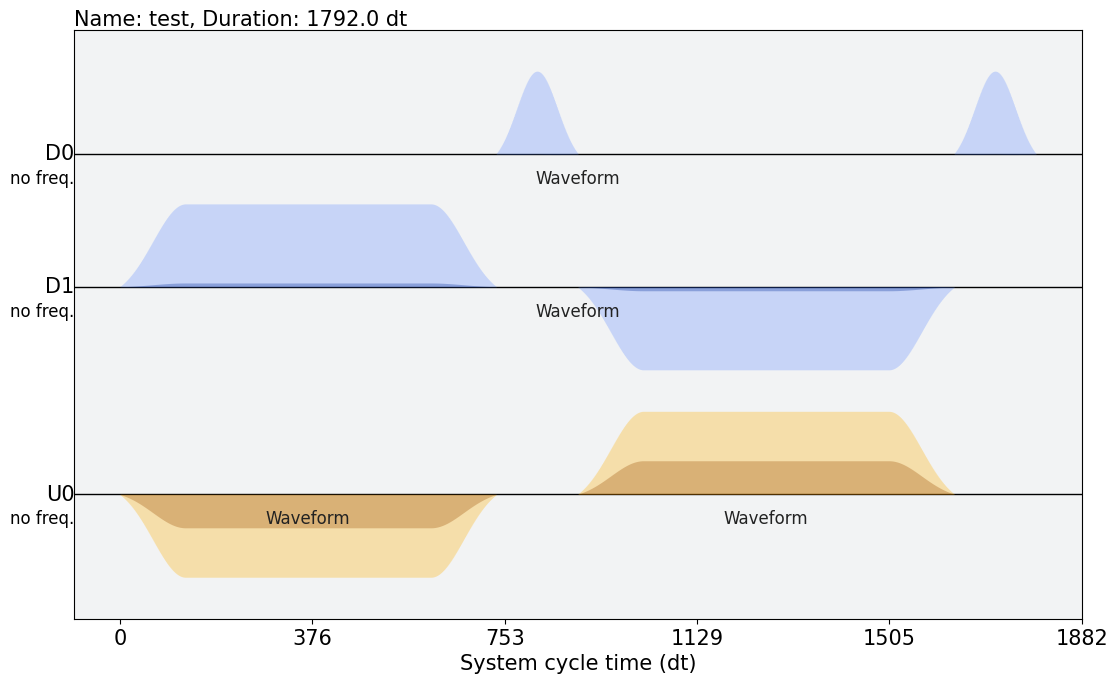

In [2]:
from Analog_Hamiltonian_Simulation.Analog_Hamiltonian_Simulator.IBM_Machine_new import (
    IBM_Machine,
)
from Analog_Hamiltonian_Simulation.Analog_Hamiltonian_Simulator.Program import Program

machine = IBM_Machine(backend)
program = Program(machine)
program.init_from_file("qaoa.as")

#Schedule the instructions greedily using the sorted DAG
program.schedule()

# program.concrete_schedule.draw()
# program.concrete_schedule.simulate()

# generate the pulse schedule
program.transpile()
# program.pulse_schedule.draw()

program.pulse_schedule.generate_external_schedule()
program.pulse_schedule.draw_external_schedule()


In [8]:
import numpy as np
from qiskit import QuantumCircuit, schedule, transpile
from qiskit.quantum_info import Operator

from Analog_Hamiltonian_Simulation.qiskit_transpiler import get_pm

pm=get_pm(backend)
qc=QuantumCircuit(16)
links=[1, 2, 3, 5, 8, 11, 14, 13, 12, 10, 7, 4]
parameter_list = (
    np.array(
        [
            0.5702193 * 2,
            -0.58631086,
            0.85160685 * 2,
            -1.7058538,
            0.29468536 * 2,
            -1.132814,
        ]
    )
)
for j in range(3):
    for i in range(6):
        qc.rzz(parameter_list[2*j],links[2*i+1],links[(2*i+2)%12])
    qc.barrier()
    for i in range(6):
        qc.rzz(parameter_list[2*j],links[2*i],links[(2*i+1)%12])
    qc.barrier()
    for i in range(12):
        qc.rx(parameter_list[2*j+1],links[i])
    qc.barrier()

qc=pm.run(qc)
qc=transpile(qc,backend)
sched=schedule(qc,backend)
# sched.draw()

In [4]:
pulse_schedule=program.pulse_schedule.external_schedule 
print(1)

1


In [9]:
qc=QuantumCircuit(16)
for i in links:
    qc.h(i)
h_sched=schedule(transpile(qc,backend),backend)

qc=QuantumCircuit(16)
for i in links:
    qc.z(i)
qc.measure_all()
meas_schedule=schedule(transpile(qc,backend),backend)


In [18]:
all_schedule=h_sched+pulse_schedule+meas_schedule


NameError: name 'h_sched' is not defined

In [5]:

job=backend.run(pulse_schedule)
from qiskit.tools import job_monitor
job_monitor(job)

Job Status: job incurred error     


In [6]:
result=job.result()
counts=result.get_counts()
print(counts)

IBMQJobFailureError: 'Unable to retrieve result for job 634d3ffb92d404b221d93353. Job has failed: Internal Error. Error code: 9999.'

In [8]:
pulse_schedule=program.pulse_schedule.external_schedule 

import numpy as np
from qiskit import QuantumCircuit, schedule, transpile
from qiskit.quantum_info import Operator

from Analog_Hamiltonian_Simulation.qiskit_transpiler import get_pm

pm=get_pm(backend)
qc=QuantumCircuit(16)
qc.rzx(2,0,1)

qc=pm.run(qc)
qc=transpile(qc,backend)
sched=schedule(qc,backend)
# sched.draw()
job=backend.run(sched)
from qiskit.tools import job_monitor
job_monitor(job)

Job Status: job has successfully run
